#Exploring the Effects of Auspice and Program in Toronto Childcare
By: Bonnie Yam

In [82]:
#import the necessary libraries for data processing, visualizations, and statistical tests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot

In [83]:
#load the dataset about Toronto childcare centres
childcare_data = pd.read_excel('INF2178_A2_data.xlsx')

#rename the columns of the 'childcare_data' DataFrame
childcare_data.columns = ['ID', 'Childcare_ID', 'Childcare_Name', 'Auspice', 'Street_Address', 'Postal_Code', 'Ward', 'Building_Type', 'Building_Name', 'Infant_Space', 'Toddler_Space',
                          'Preschooler_Space', 'Kindergarten_Space', 'School_Age_Space', 'Total_Spaces', 'Subsidy', 'CWELCC']

#add two new columns
#the Early_Years_Program column tracks the sum of infant, toddler, and preschooler spaces
childcare_data['Early_Years_Program'] = childcare_data['Infant_Space'] + childcare_data['Toddler_Space'] + childcare_data['Preschooler_Space']
#the Before_After_School_Program column tracks the sum of kindergarten and school age spaces
childcare_data['Before_After_School_Program'] = childcare_data['Kindergarten_Space'] + childcare_data['School_Age_Space']

#rename the types of auspice
childcare_data['Auspice'] = np.where(childcare_data['Auspice'] == 'Non Profit Agency', 'Non-profit', childcare_data['Auspice'])
childcare_data['Auspice'] = np.where(childcare_data['Auspice'] == 'Commercial Agency', 'Commercial', childcare_data['Auspice'])
childcare_data['Auspice'] = np.where(childcare_data['Auspice'] == 'Public (City Operated) Agency', 'Public', childcare_data['Auspice'])

#display the first 10 rows of the 'childcare_data' DataFrame
childcare_data.head(10)

,ID,Childcare_ID,Childcare_Name,Auspice,Street_Address,Postal_Code,Ward,Building_Type,Building_Name,Infant_Space,Toddler_Space,Preschooler_Space,Kindergarten_Space,School_Age_Space,Total_Spaces,Subsidy,CWELCC,Early_Years_Program,Before_After_School_Program
0,1,1013,Lakeshore Community Child Care Centre,Non-profit,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y,52,112
1,2,1014,Alternative Primary School Parent Group,Non-profit,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y,12,71
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non-profit,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y,26,76
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non-profit,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y,65,0
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non-profit,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y,26,0
5,6,1021,Centennial College Progress Campus Child Care ...,Non-profit,941 PROGRESS AVE,M1G 3T8,24,Community College/University,Centennial College Of Applied Arts & Technology,10,20,32,0,0,62,Y,Y,62,0
6,7,1029,Air-O-Down Child Care Centre,Non-profit,7 HAWKSDALE RD,M3K 1W3,6,Public High School,Downsview Secondary School,10,15,24,0,0,49,Y,Y,49,0
7,8,1031,Cedarbrae Day Nurseries (20 Greencrest),Commercial,20 GREENCREST CIRCT,M1G 1B8,24,High Rise Apartment,Greencrest Property,0,0,16,0,30,46,Y,Y,16,30
8,9,1037,Tiago Avenue Community Child Care,Non-profit,145 TIAGO AVE,M4B 2A6,19,Public Elementary School,Victoria Park Public School,0,0,21,0,30,51,Y,Y,21,30
9,10,1041,Ledbury Park Child Care Program,Non-profit,95 FALKIRK ST,M5M 4K1,8,Public Elementary School,Ledbury Park Public School,0,0,24,39,90,153,Y,Y,24,129


In [84]:
#display information about the 'childcare_data' DataFrame
childcare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           1063 non-null   int64 
 1   Childcare_ID                 1063 non-null   int64 
 2   Childcare_Name               1063 non-null   object
 3   Auspice                      1063 non-null   object
 4   Street_Address               1063 non-null   object
 5   Postal_Code                  1063 non-null   object
 6   Ward                         1063 non-null   int64 
 7   Building_Type                1063 non-null   object
 8   Building_Name                715 non-null    object
 9   Infant_Space                 1063 non-null   int64 
 10  Toddler_Space                1063 non-null   int64 
 11  Preschooler_Space            1063 non-null   int64 
 12  Kindergarten_Space           1063 non-null   int64 
 13  School_Age_Space             1063

The only column that has null values is "Building_Name".

In [85]:
#for each auspice, find the number of childcare centres
childcare_centres = childcare_data.pivot_table(values = 'Total_Spaces', index = 'Auspice', aggfunc = len)
#display childcare_centres table
childcare_centres

,Total_Spaces
Auspice,
Commercial,321
Non-profit,703
Public,39


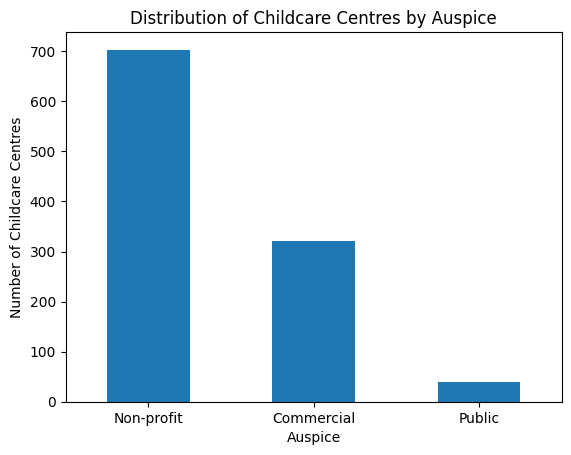

In [86]:
#visualize the distribution of childcare centres by auspice in a bar chart in descending order
childcare_centres['Total_Spaces'].sort_values(ascending = False).plot(kind='bar', stacked=True)

#set plot title
plt.title("Distribution of Childcare Centres by Auspice")

#rotate the names of the program models, in order to display them horizontally
plt.xticks(rotation = 360) #(reference 1)

#set x-axis label
plt.xlabel('Auspice')
#set y-axis label
plt.ylabel('Number of Childcare Centres')

plt.show()

#References:
#How to Rotate X-Axis Tick Label Text in Matplotlib?: Rotate X-Axis Tick Label Text using plt.xticks(). (2022, September 30). GeeksforGeeks. https://www.geeksforgeeks.org/how-to-rotate-x-axis-tick-label-text-in-matplotlib/

In [87]:
#get columns "Auspice" and "Total_Spaces", then save it as a DataFrame "auspice_spaces"
auspice_spaces = childcare_data[['Auspice', 'Total_Spaces']]

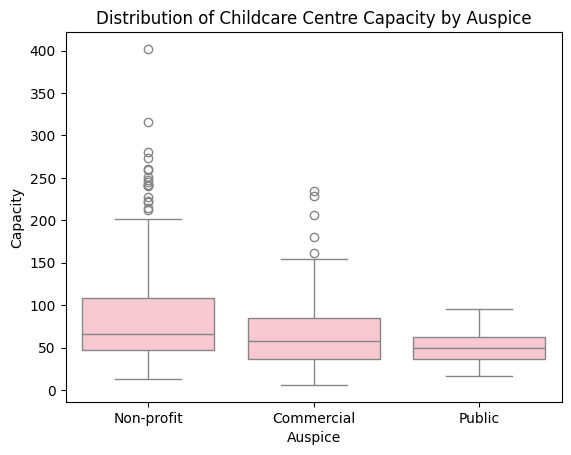

In [88]:
#visualize the distribution of childcare centres' capacity by auspice in a boxplot
sns.boxplot(x = 'Auspice', y = 'Total_Spaces', data = auspice_spaces, color = 'pink')

#set plot title
plt.title("Distribution of Childcare Centre Capacity by Auspice")

#set x-axis label
plt.xlabel('Auspice')
#set y-axis label
plt.ylabel('Capacity')

plt.show()

In [89]:
#analyze the effects of auspice on childcare capacity using one-way ANOVA
res = stat()
res.anova_stat(df = auspice_spaces, res_var = 'Total_Spaces', anova_model = 'Total_Spaces ~ C(Auspice)')
#print the one-way ANOVA summary table
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Auspice),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


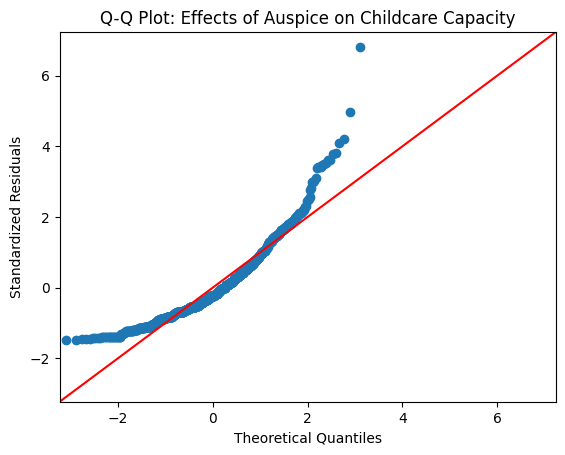

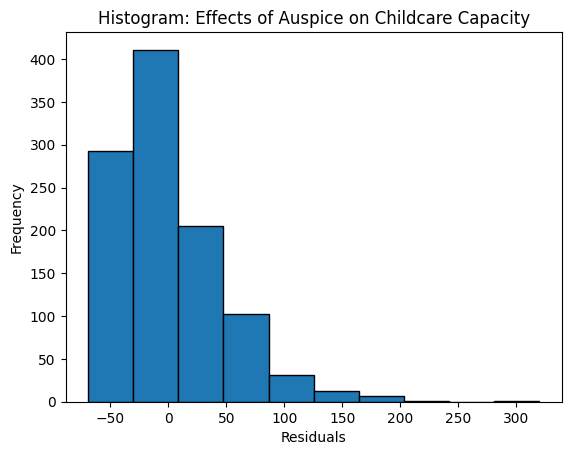

In [90]:
#check assumptions for one-way ANOVA

#assumption 1: res.anova_std_residuals are standardized residuals obtained from one-way ANOVA
#generate Q-Q plot of the standardized residuals
sm.qqplot(res.anova_std_residuals, line='45')
#set plot title
plt.title("Q-Q Plot: Effects of Auspice on Childcare Capacity")
#set x-axis label
plt.xlabel("Theoretical Quantiles")
#set y-axis label
plt.ylabel("Standardized Residuals")
plt.show()

#generate histogram of residuals
plt.hist(res.anova_model_out.resid, bins = 10, histtype = 'bar', ec = 'k')
#set plot title
plt.title("Histogram: Effects of Auspice on Childcare Capacity")
#set x-axis label
plt.xlabel("Residuals")
#set y-axis label
plt.ylabel('Frequency')
plt.show()

In [91]:
#conduct Shapiro-Wilk test to check if the residuals are normally distributed
t_stat, p_value = stats.shapiro(res.anova_model_out.resid)

#print the test statistic and p-value
print("test statistic = " + str(t_stat))
print("p-value = " + str(p_value))

test statistic = 0.901775598526001
p-value = 1.4964898448030214e-25


In [92]:
#assumption 2: variances are homogenous
#conduct Levene's test
res.levene(df = auspice_spaces, res_var = 'Total_Spaces', xfac_var = 'Auspice')
res.levene_summary

,Parameter,Value
0,Test statistics (W),17.9271
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


In [93]:
#after one-way ANOVA, perform the post-hoc test using Tukey's HSD
res = stat()
res.tukey_hsd(df = auspice_spaces, res_var = 'Total_Spaces', xfac_var = 'Auspice', anova_model = 'Total_Spaces ~ C(Auspice)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non-profit,Commercial,17.119417,9.703599,24.535235,7.662434,0.001000
1,Non-profit,Public,34.334610,16.224077,52.445142,6.292710,0.001000
2,Commercial,Public,17.215193,-1.453146,35.883531,3.060857,0.077966


In [94]:
#get columns "Auspice", "Early_Years_Program", and "Before_After_School_Program".
#then reshape the data suitable for statsmodels package and save it as a DataFrame "auspice_prog_spaces"
auspice_prog_spaces = pd.melt(childcare_data, id_vars=['Auspice'], var_name = 'Program', value_vars=['Early_Years_Program', 'Before_After_School_Program'], value_name = 'Spaces')
auspice_prog_spaces

,Auspice,Program,Spaces
0,Non-profit,Early_Years_Program,52
1,Non-profit,Early_Years_Program,12
2,Non-profit,Early_Years_Program,26
3,Non-profit,Early_Years_Program,65
4,Non-profit,Early_Years_Program,26
...,...,...,...
2121,Non-profit,Before_After_School_Program,112
2122,Non-profit,Before_After_School_Program,0
2123,Non-profit,Before_After_School_Program,0
2124,Non-profit,Before_After_School_Program,56


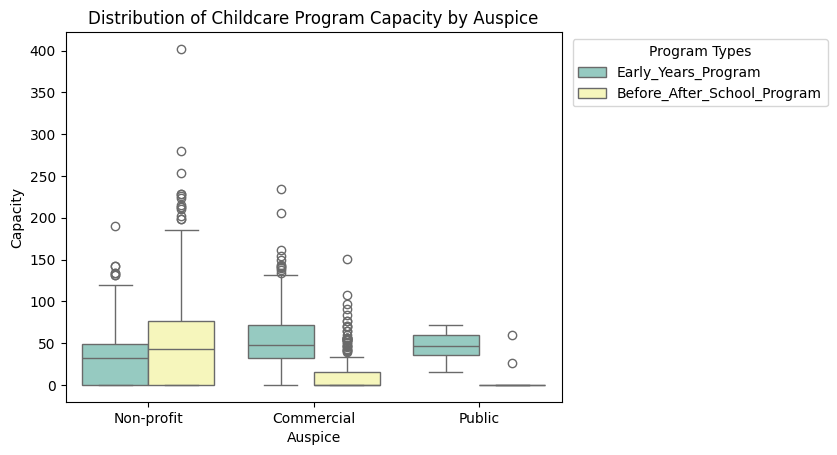

In [95]:
#visualize the distribution of childcare program capacity by auspice in a boxplot
sns.boxplot(x= 'Auspice', y = 'Spaces', hue = 'Program', data = auspice_prog_spaces, palette = 'Set3')

#set plot title
plt.title("Distribution of Childcare Program Capacity by Auspice")

#set x-axis label
plt.xlabel('Auspice')
#set y-axis label
plt.ylabel('Capacity')

#rename the legend title and move the legend outside the graph
plt.legend(title = 'Program Types', bbox_to_anchor = (1.55, 1)) #(reference 1)

plt.show()

#References:
#Matplotlib.pyplot.legend()in Python: Python Matplotlib.pyplot.legend() Syntax. (2024, January 10). GeeksforGeeks. https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/?ref=header_search

In [96]:
#analyze the effects of auspice and program on childcare capacity using two-way ANOVA
res.anova_stat(df = auspice_prog_spaces, res_var = 'Spaces', anova_model= 'Spaces ~ C(Auspice) + C(Program) + C(Auspice):C(Program)')
#print the two-way ANOVA summary table
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Auspice),2.0,4.805606e+04,24028.028573,17.023854,4.627813e-08
C(Program),1.0,7.822241e+03,7822.240828,5.542056,1.865554e-02
C(Auspice):C(Program),2.0,4.254955e+05,212747.740280,150.731734,6.214639e-62
Residual,2120.0,2.992238e+06,1411.432977,NaN,NaN


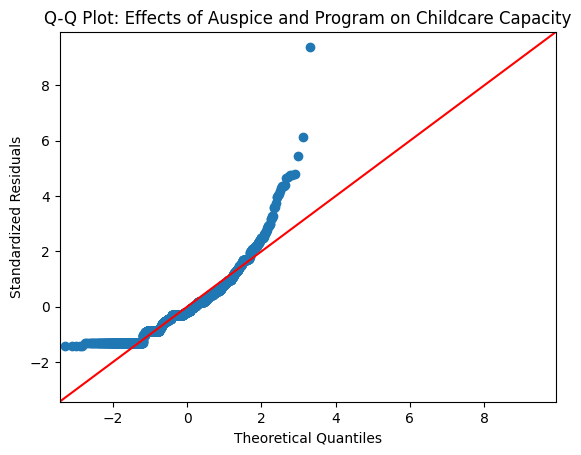

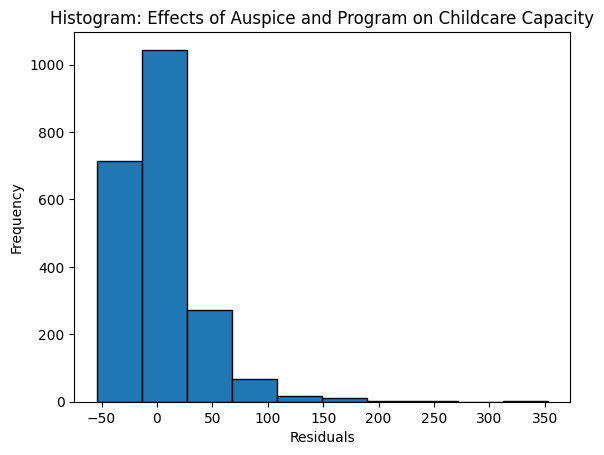

In [97]:
#check assumptions for two-way ANOVA

#assumption 1: res.anova_std_residuals are standardized residuals obtained from two-way ANOVA
#generate Q-Q plot of the standardized residuals
sm.qqplot(res.anova_std_residuals, line='45')
#set plot title
plt.title("Q-Q Plot: Effects of Auspice and Program on Childcare Capacity")
#set x-axis label
plt.xlabel("Theoretical Quantiles")
#set y-axis label
plt.ylabel("Standardized Residuals")
plt.show()

#generate histogram of residuals
plt.hist(res.anova_model_out.resid, bins = 10, histtype = 'bar', ec = 'k')
#set plot title
plt.title("Histogram: Effects of Auspice and Program on Childcare Capacity")
#set x-axis label
plt.xlabel("Residuals")
#set y-axis label
plt.ylabel('Frequency')
plt.show()

In [98]:
#conduct Shapiro-Wilk test to check if the residuals are normally distributed
t_stat, p_value = stats.shapiro(res.anova_model_out.resid)

#print the test statistic and p-value
print("test statistic = " + str(t_stat))
print("p-value = " + str(p_value))

test statistic = 0.8920707702636719
p-value = 3.225015817172727e-36


In [99]:
#assumption 2: variances are homogenous
#conduct Levene's test
res = stat()
res.levene(df = auspice_prog_spaces, res_var='Spaces', xfac_var=['Auspice', 'Program'])
res.levene_summary

,Parameter,Value
0,Test statistics (W),81.4738
1,Degrees of freedom (Df),5.0000
2,p value,0.0000


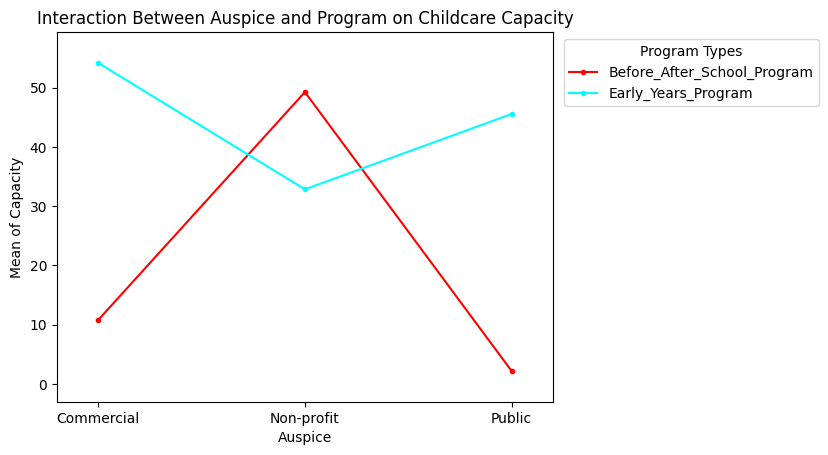

In [100]:
#generate an interaction plot between Auspice and Program
fig = interaction_plot(x = auspice_prog_spaces['Auspice'], trace = auspice_prog_spaces['Program'], response = auspice_prog_spaces['Spaces'])

#set plot title
plt.title("Interaction Between Auspice and Program on Childcare Capacity")

#set x-axis label
plt.xlabel('Auspice')
#set y-axis label
plt.ylabel('Mean of Capacity')

#rename the legend title and move the legend outside the graph
plt.legend(title = 'Program Types', bbox_to_anchor = (1.55, 1))
plt.show()

In [101]:
#after two-way ANOVA, perform the post-hoc test using Tukey's HSD for main effect Auspice
res.tukey_hsd(df = auspice_prog_spaces, res_var = 'Spaces', xfac_var = 'Auspice', anova_model = 'Spaces ~ C(Auspice) + C(Program) + C(Auspice):C(Program)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non-profit,Commercial,8.559709,4.362628,12.756789,6.764552,0.001000
1,Non-profit,Public,17.167305,6.917409,27.417201,5.555332,0.001000
2,Commercial,Public,8.607596,-1.957997,19.173190,2.702187,0.135873


In [102]:
#perform the post-hoc test using Tukey's HSD for main effect Program
res.tukey_hsd(df = auspice_prog_spaces, res_var = 'Spaces', xfac_var = 'Program', anova_model = 'Spaces ~ C(Auspice) + C(Program) + C(Auspice):C(Program)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Early_Years_Program,Before_After_School_Program,3.836312,0.640549,7.032076,3.329281,0.018657


In [103]:
#perform the post-hoc test using Tukey's HSD for interaction effect: Auspice and Program
res.tukey_hsd(df = auspice_prog_spaces, res_var = 'Spaces', xfac_var = ['Auspice', 'Program'], anova_model = 'Spaces ~ C(Auspice) + C(Program) + C(Auspice):C(Program)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non-profit, Early_Years_Program)","(Non-profit, Before_After_School_Program)",16.411095,10.695511,22.126680,11.582041,0.001000
1,"(Non-profit, Early_Years_Program)","(Commercial, Early_Years_Program)",21.334313,14.115877,28.552749,11.921852,0.001000
2,"(Non-profit, Early_Years_Program)","(Commercial, Before_After_School_Program)",22.042634,14.824198,29.261070,12.317670,0.001000
3,"(Non-profit, Early_Years_Program)","(Public, Early_Years_Program)",12.717730,-4.910767,30.346227,2.910064,0.310168
4,"(Non-profit, Early_Years_Program)","(Public, Before_After_School_Program)",30.641244,13.012747,48.269742,7.011312,0.001000
5,"(Non-profit, Before_After_School_Program)","(Commercial, Early_Years_Program)",4.923217,-2.295219,12.141653,2.751149,0.375797
6,"(Non-profit, Before_After_School_Program)","(Commercial, Before_After_School_Program)",38.453730,31.235294,45.672166,21.488373,0.001000
7,"(Non-profit, Before_After_School_Program)","(Public, Early_Years_Program)",3.693365,-13.935132,21.321863,0.845114,0.900000
8,"(Non-profit, Before_After_School_Program)","(Public, Before_After_School_Program)",47.052340,29.423842,64.680837,10.766489,0.001000
9,"(Commercial, Early_Years_Program)","(Commercial, Before_After_School_Program)",43.376947,34.918594,51.835300,20.686231,0.001000
